# Proyecto 1 | Inteligencia Artificial
## Integrantes:
- **César Jiménez Salazar** - 2021052709
- **Maynor Martínez Hernández** - 2021052792
- **Fernanda Murillo Mena** - 2021077803

## Descripción
Este proyecto tiene como objetivo principal aplicar diversas técnicas de clasificación de datos aplicados para dos conjuntos de datos, esto permite explorar diversas herramientas relacionadas al Machine Learning, y contribuir al desarrollo del conocimiento a partir de la investigación. Se utilizarán los modelos KNN, regresión lineal y redes neuronales con el fin de analizar ambos conjuntos de datos.

## Conjunto de datos
1. **Pima Indians Diabetes Database**
    - **URL:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
    - **Descripción:** Este conjunto de datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia india Pima.
2. **Heart Failure Prediction Dataset** <br>
   Este fue el dataset elegido por el equipo de trabajo debido a que fue el dataset relacionado a salud con una cantidad de features adecuada y el más parecido al primer dataset dado por el profesor en cuanto al tamaño de samples. 
    - **URL:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
    - **Descripción:** Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial y se estima que cobran 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en mujeres menores de 70 años. La insuficiencia cardíaca es un evento común causado por enfermedades cardiovasculares y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca. Las mujeres con enfermedades cardiovasculares o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedades ya establecidas) necesitan una detección y un tratamiento precoz en el que un modelo de aprendizaje automático puede ser de gran ayuda.

## Pima Indians Diabetes Database
Inicialmente, se procede con la exploración y el preprocesamiento de datos para el conjunto de datos *Pima Indians Diabetes Database*. Dicho dataset fue dado por el profesor del curso.

### Analisis Exploratorio de Datos
Primero, se importan las librerías necesarias para el análisis exploratorio de datos.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ahora, se procede a cargar los datos del dataset. Del mismo modo, se comienza a explorar el conjunto de datos para obtener la información básica importante. Para lograr esto, se visualizan algunos datos para poder ver las columnas y los datos correspondientes, se obtienen las estadísticas básicas, la cantidad de datos faltantes y la correlación entre columnas.

In [13]:
# Load dataset
df_diabetes = pd.read_csv('diabetes.csv')

# Display 20 rows 
print(df_diabetes.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [14]:
# Get basic statistics 
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [15]:
# Number of missing values in each column
print(df_diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# Correlation between columns
print(df_diabetes.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [17]:
df_diabetes.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Con esta información, se obtiene que el dataset posee 9 columnas de las cuales *pregnancies* tiene la posibilidad de tener un 0 sin que sea un problema para el análisis, esto porque una mujer puede tener 0 embarazos. Además, la columna *outcome* tiene un valor binario por lo que también puede tener un valor 0. Se evidencia que el dataset tiene una cantidad de 768 datos y que no hay datos nulos o faltantes.

Ahora, se procede a revisar si hay filas duplicadas para eliminarlas. Del mismo modo, tras el análisis anterior se pudo notar que algunas columnas (además de las permitidas) poseen valores en 0 por lo que es de suma importancia corregirlo para el análisis del dataset con los modelos más adelante. Para esto, se decidió recurrir a la imputación de datos por la media, es decir, reemplazar los valores en 0 encontrados en todas las columnas excepto *pregnancies* y *outcome* por la media correspondiente a la columna.

In [5]:
# Check for duplicate rows and remove them
print(df_diabetes.duplicated().sum())
df_diabetes = df_diabetes.drop_duplicates()

0


In [18]:
# Check for missing values for 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

Debido a que no habían filas duplicadas, no se eliminó nada. Tras el cambio del dataset realizado con la imputación por la media, se puede proceder a analizar mediante el uso de diversos diagramas para ver el comportamiento del dataset de manera visual.

El siguiente histograma permitirá ver el rango de edades que se encuentran dentro del conjunto de datos, esto con el fin de obtener una idea general de los datos obtenidos.

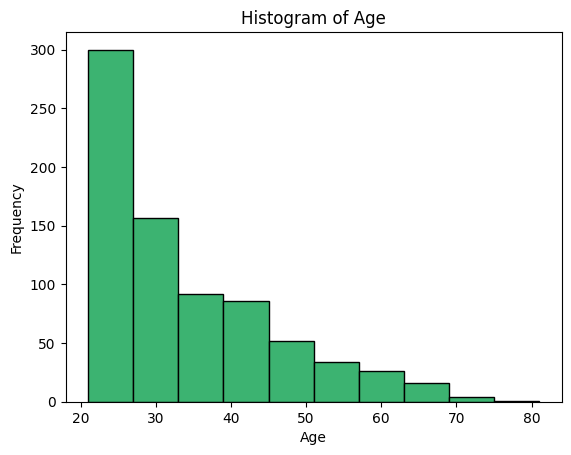

In [26]:
# Histogram of the Age column
plt.hist(df_diabetes['Age'], bins=10, color='#3CB371', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Con lainformación obtenida se evidencia que la mayoría de mujeres se encuentra en un rango de edad entre 20 y 30 años. Ahora, se procede con un análisis un poco más profundo. Se desea observar el porcentaje y la cantidad de mujeres diabéticas en comparación con las mujeres que no lo padecen.

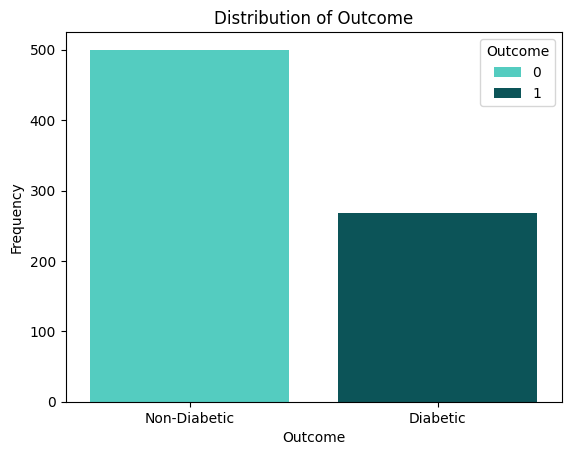

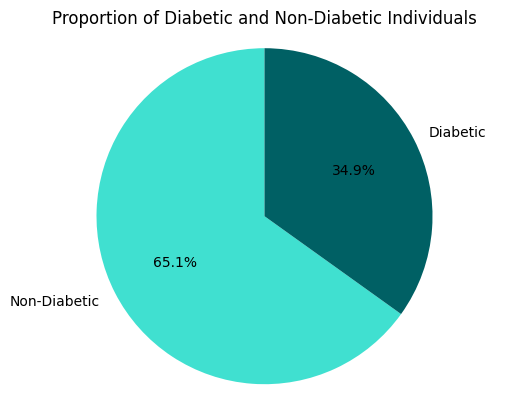

In [39]:
# Distribution of the Outcome column for people with diabetes and people without diabetes
palette_colors = {0: "#40E0D0", 1: "#006064"}  
sns.countplot(x='Outcome', data=df_diabetes, hue="Outcome", palette=palette_colors)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()


# Pie chart to visualize the proportion of diabetic and non-diabetic individuals
labels = ['Non-Diabetic', 'Diabetic']
sizes = df_diabetes['Outcome'].value_counts()
colors = ['#40E0D0', '#006064']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diabetic and Non-Diabetic Individuals')
plt.axis('equal')
plt.show()

Con base en los resultados obtenidos, se puede ver que existe una mayor cantidad de mujeres que no padecen de diabetes en el conjunto de datos con un 65.1% de los 768 datos existentes.

Ahora, para obtener una idea de como están relacionados los *features* con el hecho de que una mujer sea diabética o no, se pretende comparar cada columna con la columna de *outcome*. Para agilizar este proceso, primero se creó una función que recibe el dataset, el arreglo de *features* con la cual se pretende comparar y la columna con la que se va a comparar.

In [95]:
def plot_stacked_histogram(df, features, split_column):
    colors = ['#40E0D0', '#006064']
    for feature in features:
        if feature in df.columns and split_column in df.columns:
            plt.hist([df[df[split_column] == 0][feature], df[df[split_column] == 1][feature]], 
                     bins=10, stacked=True, color=colors, 
                     label=[f'Not {split_column}', f'{split_column}'], edgecolor='black')
            plt.title(f'Stacked Histogram of {feature} by {split_column}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.legend()
            plt.show()
        else:
            print(f"The feature '{feature}' or the split column '{split_column}' is not in the DataFrame.")

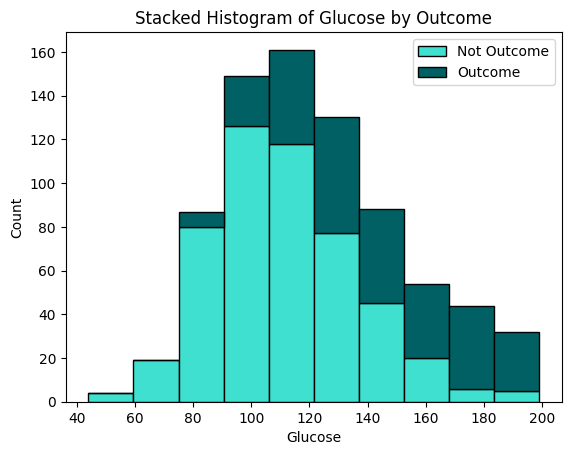

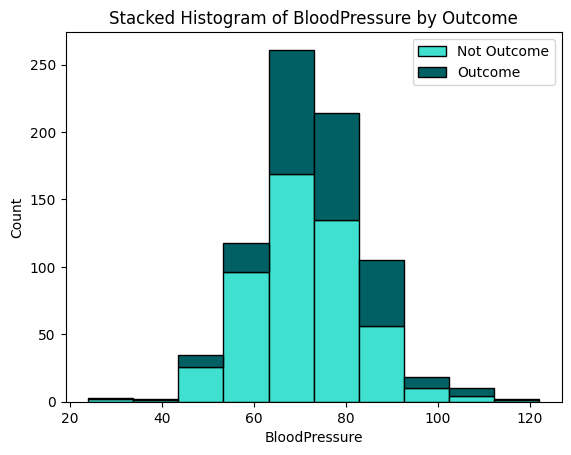

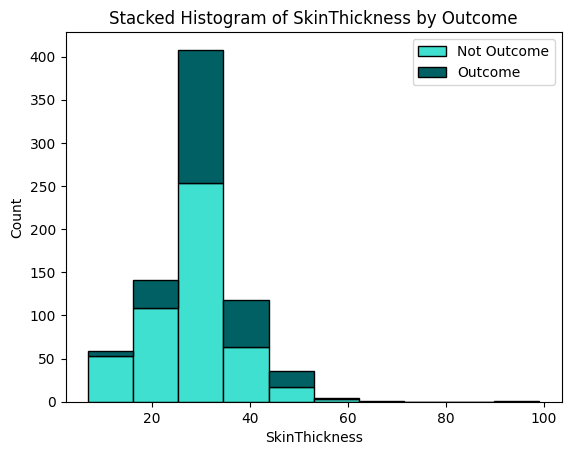

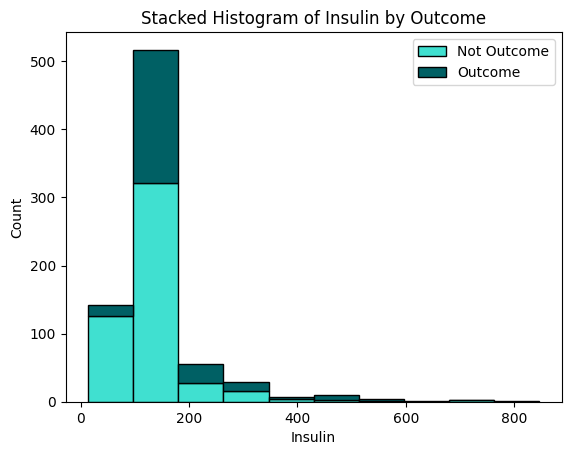

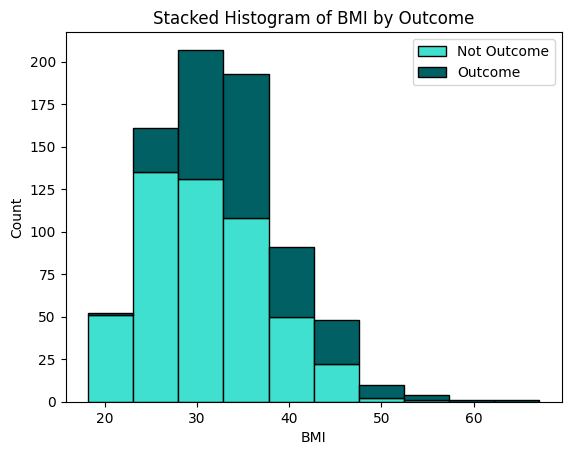

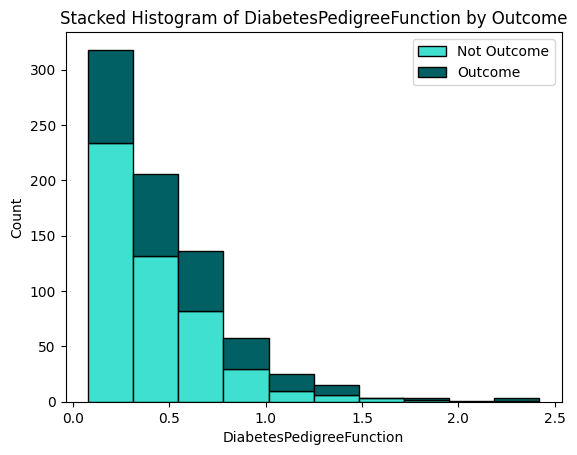

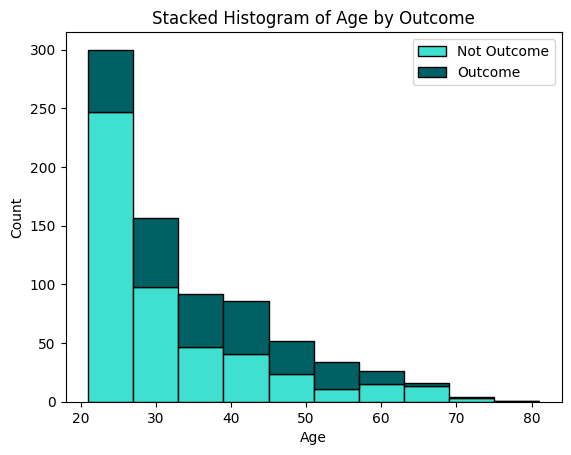

In [97]:
# Call the function to plot the stacked histograms
plot_stacked_histogram(df_diabetes, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 'Outcome')

Con base en los histogramas obtenidos, es fácil de observar que en su mayoría para cualquier feature donde están los valores altos es donde hay más concentración de mujeres diabéticas. Es importante ver que no es tan significativo en algunos casos como lo es la presión sanguínea.

Ahora, para observar que tan relacionada está la edad con estos datos vistos anteriormente, se pretende evaluar de manera similar cada columna en comparación de la edad para ver las diabéticas y las no diabéticas. Para este caso se recurrió al uso de diagramas de dispersión. Se seguió una técnica para agilizar el proceso similar al anterior donde se crea una función que luego se llama con el nombre del *dataset*, el arreglo de *features* a evaluar, las columnas a comparar y los *labels*.

In [106]:
colors = ['#40E0D0', '#006064']

def scatter_plots_by_feature_and_split(df, features, split_column, y_column, labels):
    for feature in features:
        fig, ax = plt.subplots()  # Create a new figure and axis for each feature

        for idx, outcome in enumerate(sorted(df[split_column].unique())):
            subset = df[df[split_column] == outcome]
            ax.scatter(subset[feature], subset[y_column], c=colors[idx % len(colors)], label=labels[idx])

        ax.set_title(f'Scatter Plot of {feature} vs {y_column} by {split_column}')
        ax.set_xlabel(feature)
        ax.set_ylabel(y_column)
        ax.legend()

        plt.show()

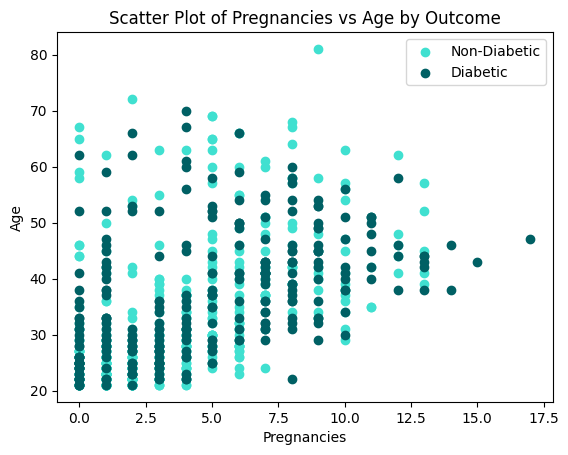

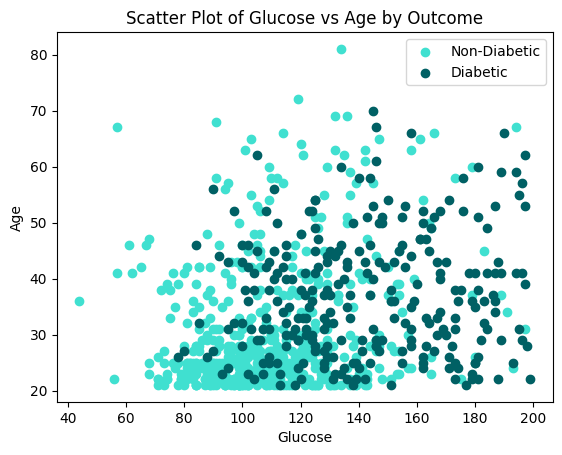

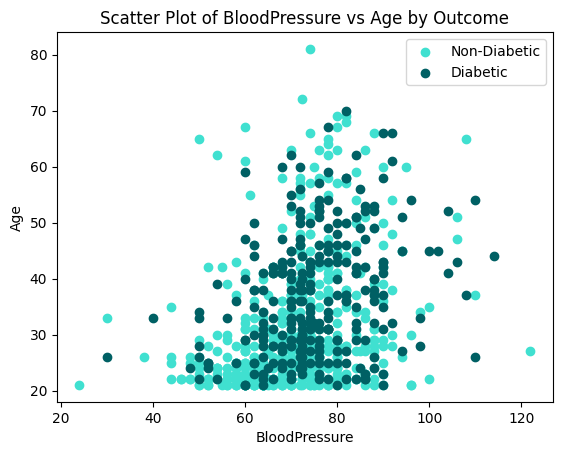

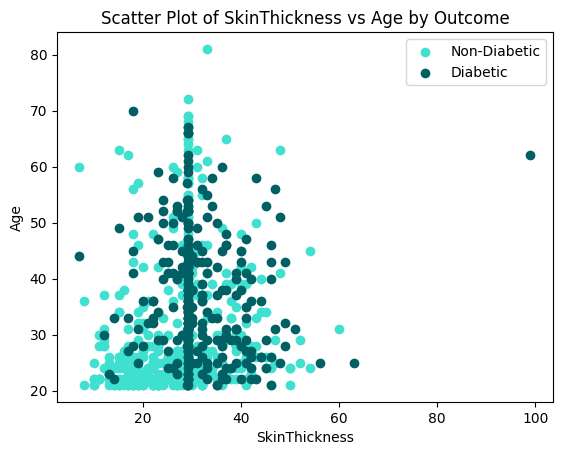

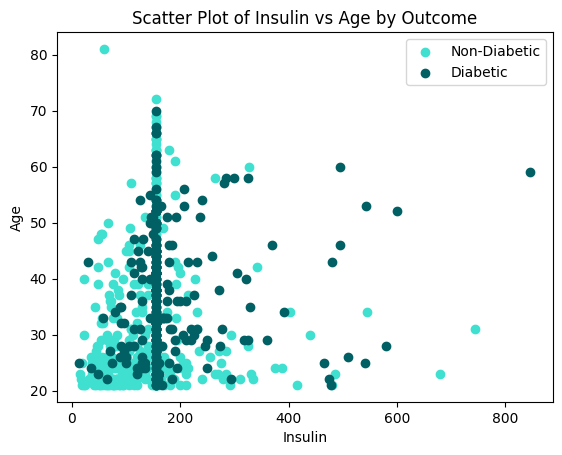

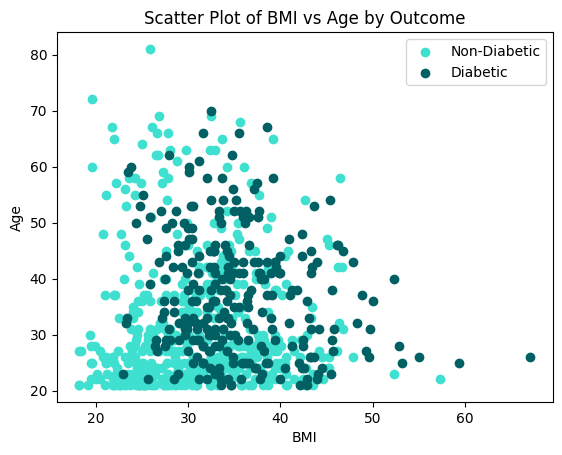

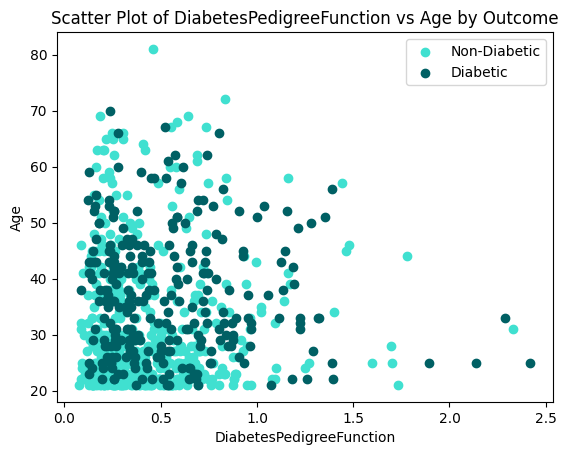

In [107]:
# Call the function to plot the scatter plots
labels = ['Non-Diabetic', 'Diabetic']
scatter_plots_by_feature_and_split(df_diabetes, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], 'Outcome', 'Age', labels)

Con los resultados obtenidos, se muestra que las mujeresd diabéticas tienden a estar entre los valores más bajos en cuantos a edad. Los datos están más concentrados en las edades bajas en todos los *features* sólo en algunos casos como los embarazos o nuevamente la prsión sanguíonea tienen más disperción de datos.

Con esto se concluye con el análisis del primer dataset. 

## Heart Failure Prediction Dataset
Seguidamente, se procede con la exploración y el preprocesamiento de datos para el conjunto de datos *Heart Failure Prediction Dataset*. Dicho *dataset* fue elegido por el equipo de trabajo cómo el segundo conjunto de datos a analizar. Al inicio del notebook se explicó el motivo de su elección, en el informe se ampliará más en detalle dicho motivo.

### Analisis Exploratorio de Datos
Primero, se importan las librerías necesarias para el análisis exploratorio de datos.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ahora, se procede a cargar los datos del nuevo *dataset*. Del mismo modo, se comienza a explorar el conjunto de datos para obtener la información básica importante. Para lograr esto, se visualizan algunos datos para poder ver las columnas y los datos correspondientes, se obtienen las estadísticas básicas, la cantidad de datos faltantes y la correlación entre columnas.

In [72]:
# Load dataset
df_heart = pd.read_csv('heart.csv')

# Display 20 rows
print(df_heart.head(20))

    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    54   M           ATA        110          208          0     Normal   
8    37   M           ASY        140          207          0     Normal   
9    48   F           ATA        120          284          0     Normal   
10   37   F           NAP        130          211          0     Normal   
11   58   M           ATA        136          164          0         ST   
12   39   M           ATA

In [47]:
# Get basic statistics 
print(df_heart.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [48]:
# Number of missing values in each column
print(df_heart.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [50]:
df_heart.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

Con esta información, se obtiene que el *dataset* posee 12 columnas de las cuales *FastingsBS*, *Oldpeak* u obviamente *HeartDisease* tienen la posibilidad de tener un 0 sin que sea un problema para el análisis. Adicionalmente, se evidencia que el dataset tiene una cantidad de 918 datos y que no hay datos nulos o faltantes.

Ahora, se procede a revisar si hay filas duplicadas para eliminarlas. Del mismo modo, tras el análisis anterior se pudo notar que la mayoría de las columnas posee un valor no numérico por lo que se procede a codificar cada una con el fin de obtener columnas con datos totalmente numéricos. A continuación se explican las codificaciones: 
- Para las columnas *Sex* y *ExerciseAngina* se utilizó una codificación binaria debido a que sólo tenían dos posibles valores.
  - *Sex* se utiliza **1** para M y **0** para F.
  - *ExerciseAngina* se utiliza **1** para Y y **0** para N.
- Para las columnas *ChestPainType*, *RestingECG* y *ST_Slope* se utilizó la codificación de one-hot para evitar que se asuma un orden numérico entre las categorías. 
  - *ChestPainType* se divide ahora en **4 columnas**, cada una referente a los posibles datos: ATA, NAP, ASY, TA. Ahora, cada una de estas columnas ahora tiene valores binarios donde tiene *true* donde sí tiene ese dato y *false* en las demás columnas de la fila correspondiente.
  - *RestingECG* se divide ahora en **3 columnas**, cada una referente a los posibles datos: Normal, ST, LVH. Ahora, cada una de estas columnas ahora tiene valores binarios donde tiene *true* donde sí tiene ese dato y *false* en las demás columnas de la fila correspondiente.
  - *ST_Slope* se divide ahora en **3 columnas**, cada una referente a los posibles datos: Up, Flat, Down. Ahora, cada una de estas columnas ahora tiene valores binarios donde tiene *true* donde sí tiene ese dato y *false* en las demás columnas de la fila correspondiente.

In [51]:
# Check for duplicate rows and remove them
print(df_heart.duplicated().sum())
df_heart = df_heart.drop_duplicates()

0


In [73]:
# Binary codification 
df_heart['Sex'] = df_heart['Sex'].map({'M': 1, 'F': 0}) 
df_heart['ExerciseAngina'] = df_heart['ExerciseAngina'].map({'Y': 1, 'N': 0})  

# One-hot codification
df_heart = pd.get_dummies(df_heart, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

In [74]:
print(df_heart.head(20))

    Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0    40    1        140          289          0    172               0   
1    49    0        160          180          0    156               0   
2    37    1        130          283          0     98               0   
3    48    0        138          214          0    108               1   
4    54    1        150          195          0    122               0   
5    39    1        120          339          0    170               0   
6    45    0        130          237          0    170               0   
7    54    1        110          208          0    142               0   
8    37    1        140          207          0    130               1   
9    48    0        120          284          0    120               0   
10   37    0        130          211          0    142               0   
11   58    1        136          164          0     99               1   
12   39    1        120          204  

In [75]:
print(df_heart.corr())

                        Age       Sex  RestingBP  Cholesterol  FastingBS  \
Age                1.000000  0.055750   0.254399    -0.095282   0.198039   
Sex                0.055750  1.000000   0.005133    -0.200092   0.120076   
RestingBP          0.254399  0.005133   1.000000     0.100893   0.070193   
Cholesterol       -0.095282 -0.200092   0.100893     1.000000  -0.260974   
FastingBS          0.198039  0.120076   0.070193    -0.260974   1.000000   
MaxHR             -0.382045 -0.189186  -0.112135     0.235792  -0.131438   
ExerciseAngina     0.215793  0.190664   0.155101    -0.034166   0.060451   
Oldpeak            0.258612  0.105734   0.164803     0.050148   0.052698   
HeartDisease       0.282039  0.305445   0.107589    -0.232741   0.267291   
ChestPainType_ATA -0.218165 -0.161522  -0.046153     0.150954  -0.140514   
ChestPainType_NAP -0.011335 -0.066486  -0.041348    -0.006634  -0.039249   
ChestPainType_TA   0.032042 -0.004031   0.049855     0.017365   0.026885   
RestingECG_N

Debido a que no habían filas duplicadas, no se eliminó nada. Tras el cambio del dataset realizado con la codificación binaria y one-hot, se puede proceder a analizar mediante el uso de diversos diagramas para ver el comportamiento del dataset de manera visual.

El siguiente histograma permitirá ver el rango de edades y sexo que se encuentran dentro del conjunto de datos, esto con el fin de obtener una idea general de los datos obtenidos.

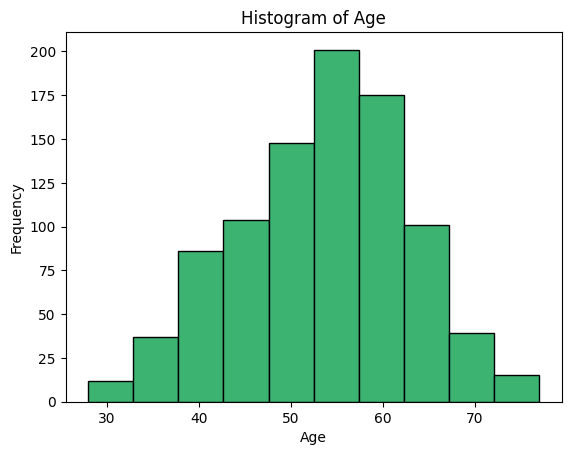

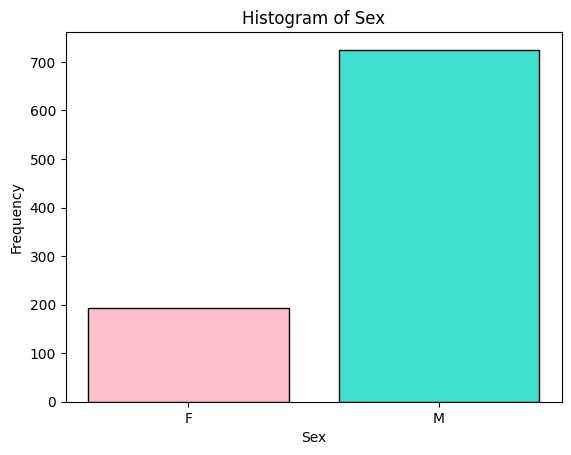

In [85]:
# Histogram of the Age column
plt.hist(df_heart['Age'], bins=10, color='#3CB371', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram of the Sex column
male_count = np.sum(df_heart['Sex'] == 1)
female_count = np.sum(df_heart['Sex'] == 0)
plt.bar(['F', 'M'], [female_count, male_count], color=['#FFC0CB', '#40E0D0'], edgecolor='black')  
plt.title('Histogram of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

Con los datos obtenidos, se evidencia que la mayoría de las personas se encuentran en un rango de edad entre 50 y 60 años, además que la mayoría son hombres.

Ahora, se procede con un análisis un poco más profundo. Se desea observar el porcentaje y la cantidad de personas que sí tienen una enfermedad cardiovascular en comparación con las personas que no lo tienen.

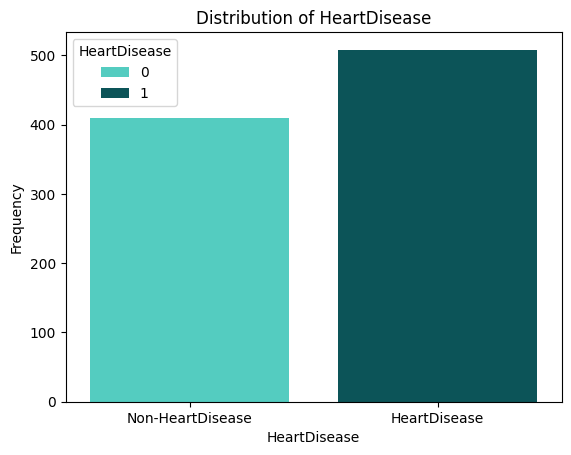

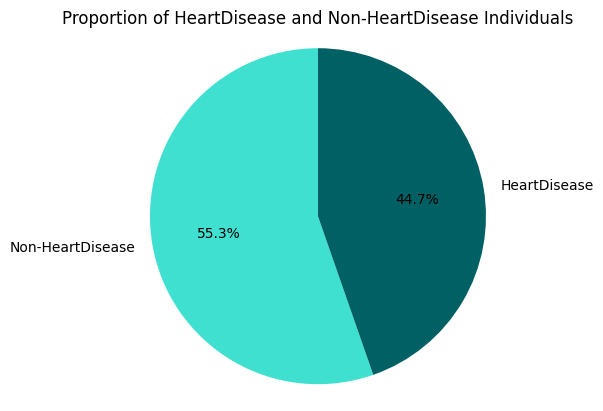

In [86]:
# Distribution of the HeartDisease column for people with a heart disease and people without a heart disease
palette_colors = {0: "#40E0D0", 1: "#006064"}  
sns.countplot(x='HeartDisease', data=df_heart, hue="HeartDisease", palette=palette_colors)
plt.title('Distribution of HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-HeartDisease', 'HeartDisease'])
plt.show()


# Pie chart to visualize the proportion of diabetic and non-diabetic individuals
labels = ['Non-HeartDisease', 'HeartDisease']
sizes = df_heart['HeartDisease'].value_counts()
colors = ['#40E0D0', '#006064']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of HeartDisease and Non-HeartDisease Individuals')
plt.axis('equal')
plt.show()

Con base en los resultados obtenidos, se puede ver que existe una mayor cantidad de persona que sí padecen de una enfermadad cardiovascular en el conjunto de datos con un 55.3% de los 918 datos existentes.

Ahora, para obtener una idea de como están relacionados los *features* con el hecho de que una persona tenga una enfermadad cardiovascular o no, se pretende comparar cada columna con la columna de *HeartDisease*. Para agilizar este proceso, se utilizará la misma función `plot_stacked_histogram` usada en el primer *dataset*, el arreglo de *features* con la cual se pretende comparar y la columna con la que se comparará.

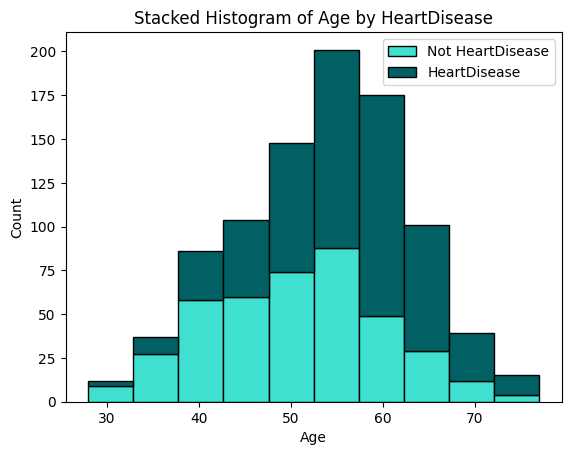

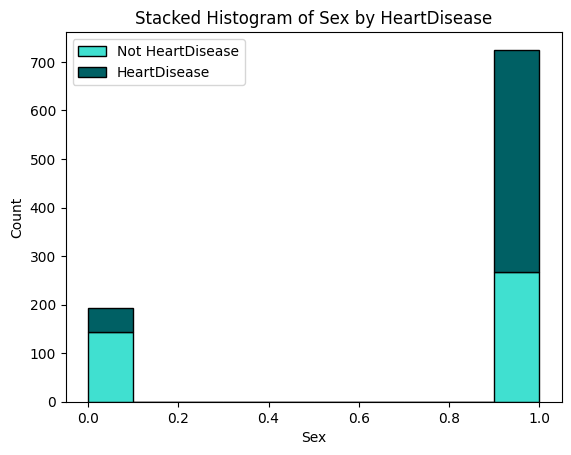

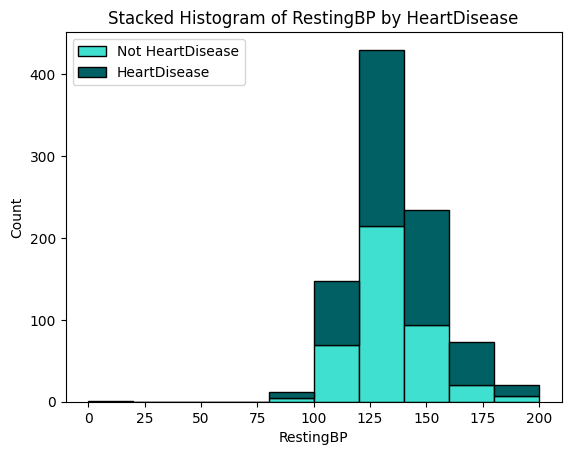

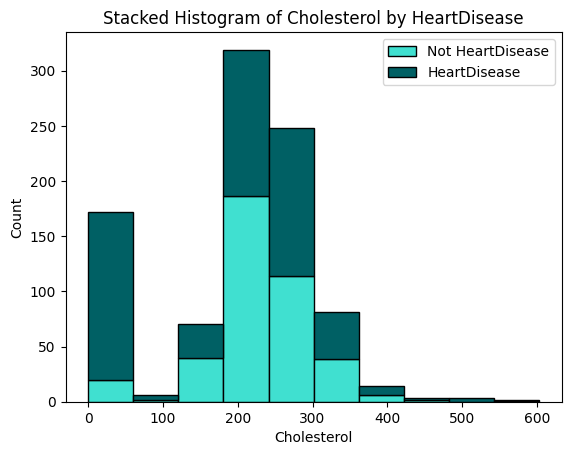

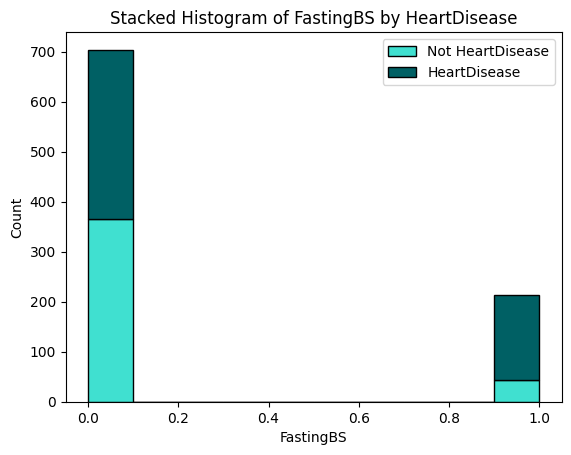

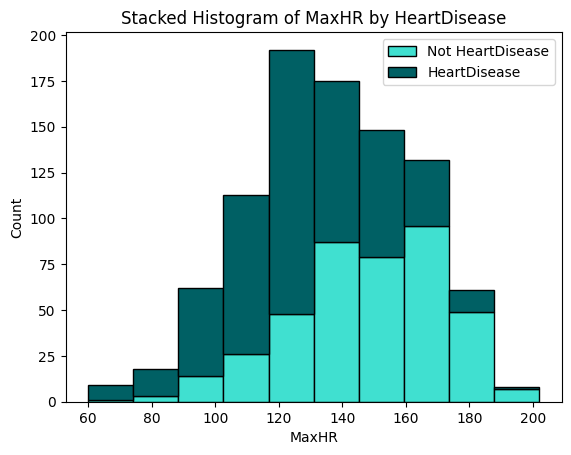

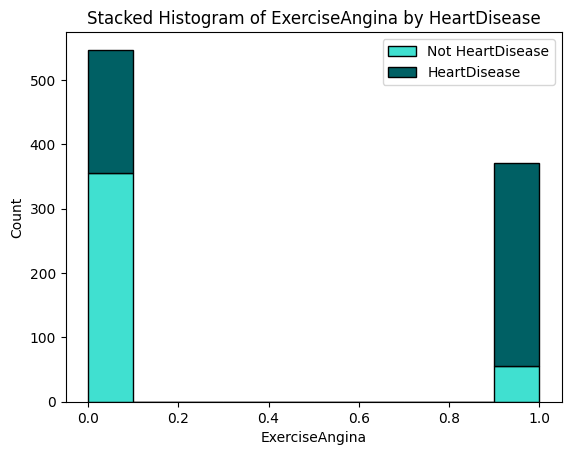

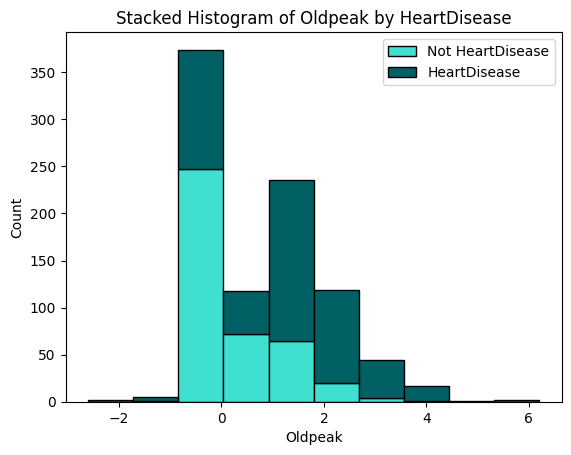

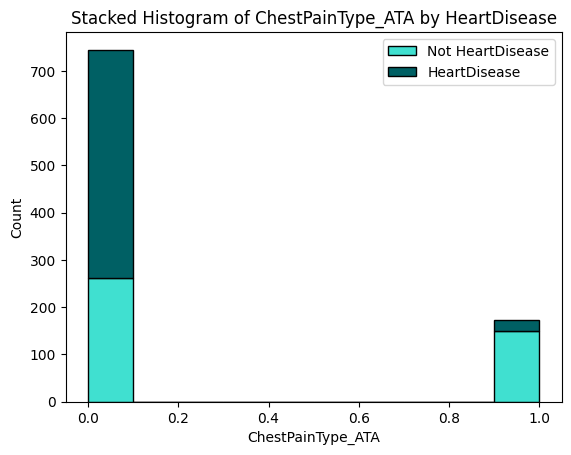

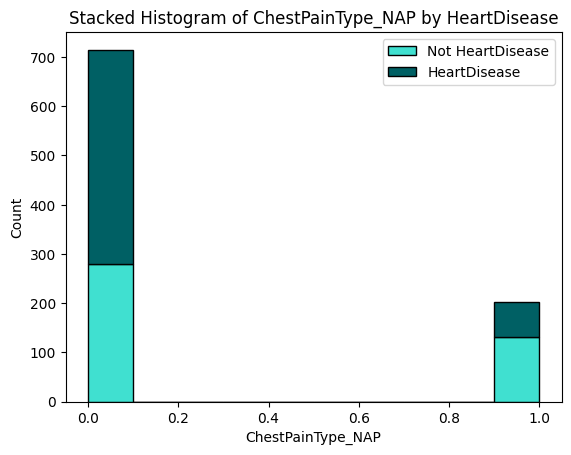

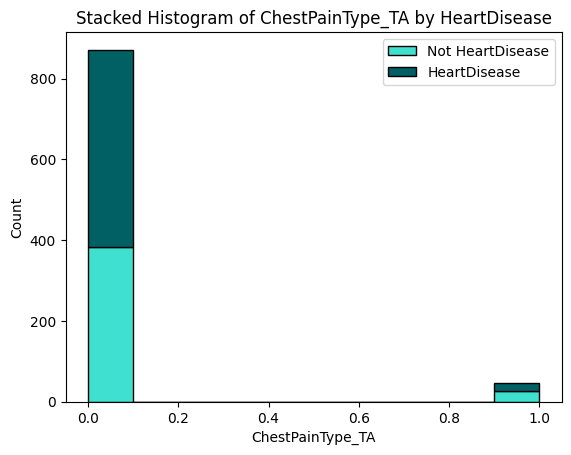

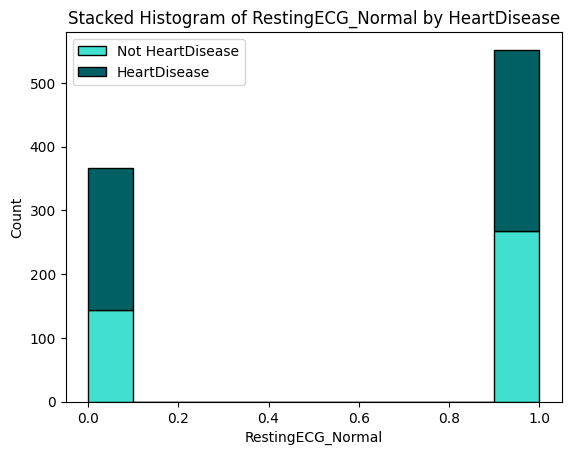

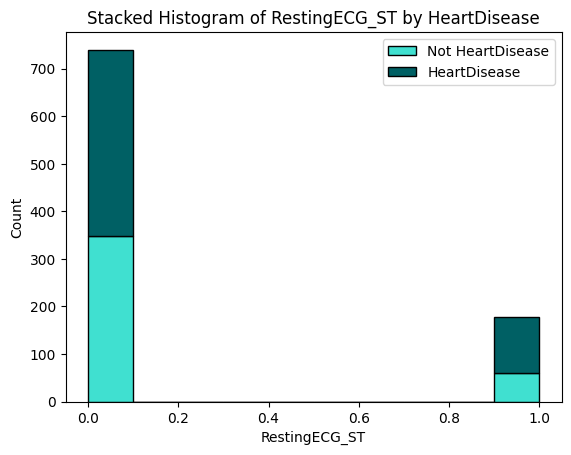

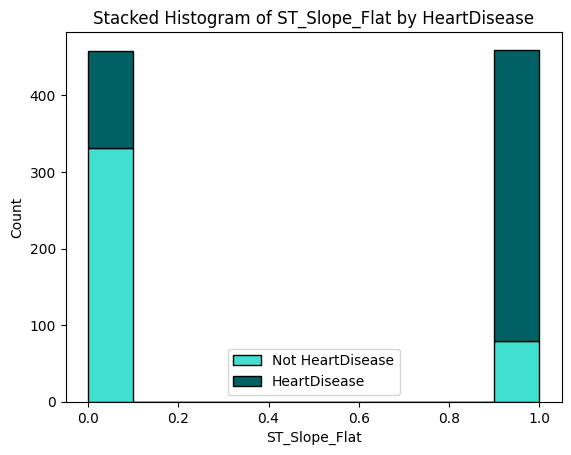

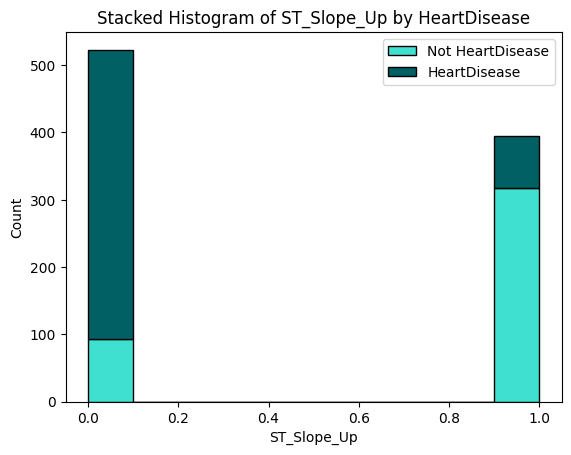

In [111]:
# Call the function to plot the stacked histograms
plot_stacked_histogram(df_heart, ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
                                  'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
                                  'ST_Slope_Flat', 'ST_Slope_Up'], 'HeartDisease')

Con base en los histogramas obtenidos, es fácil de observar que en su mayoría para cualquier feature donde están los valores altos es donde hay más concentración de personas con enfermedades cardiovasculares. Es importante ver que no es tan significativo en algunos casos como lo es con el MaxHR, Cholesterol e inclusive la edad.

Ahora, para observar que tan relacionada está la edad con estos datos vistos anteriormente, se pretende evaluar de manera similar cada columna en comparación de la edad para ver que tanto puede influir en tener una enfermedad cardiovacular o no. Para este caso se recurrió al uso de diagramas de dispersión. Se seguió la misma técnica para agilizar el proceso igual al usado con el dataset anterior donde se llama con el nombre del *dataset* y el arreglo de *features* a evaluar, los *features* por comparar y los *labels* que se utilizarán.

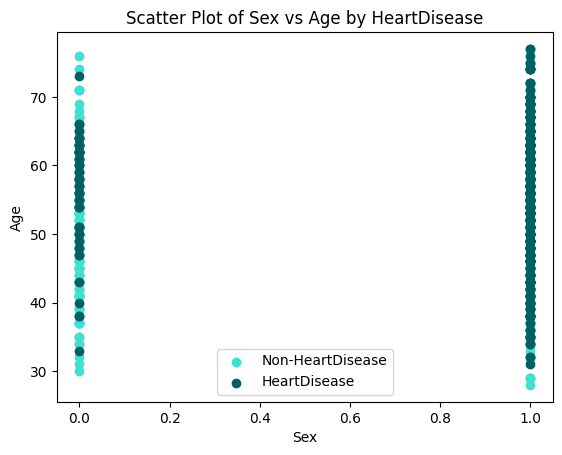

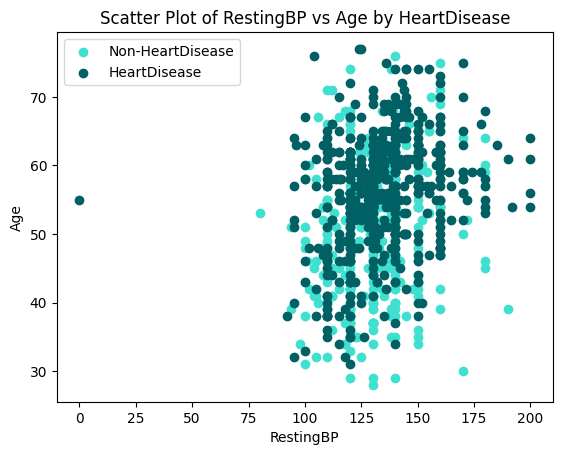

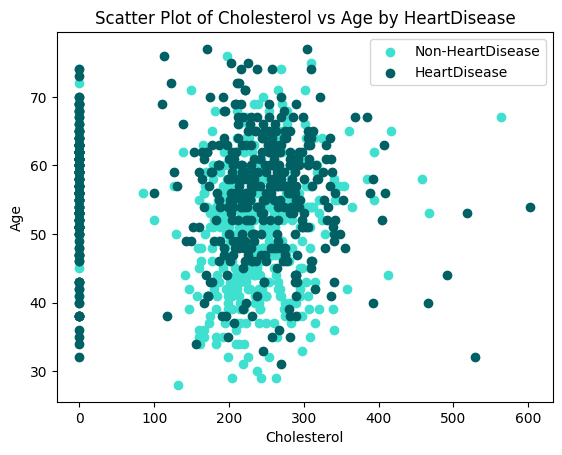

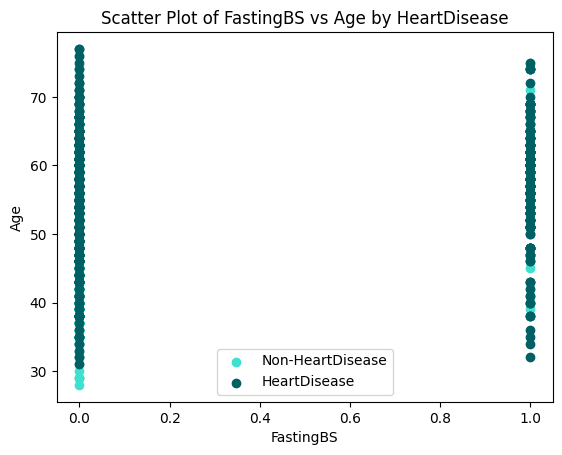

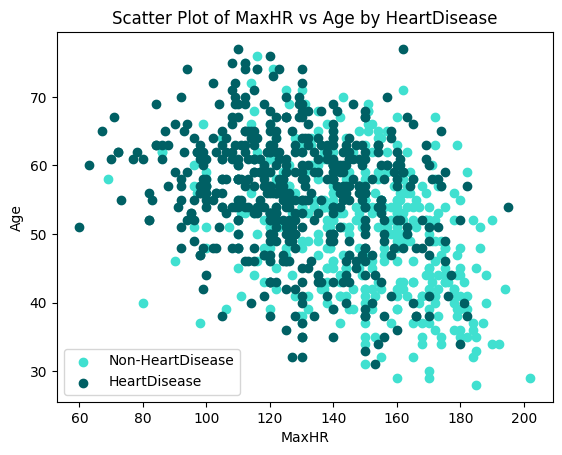

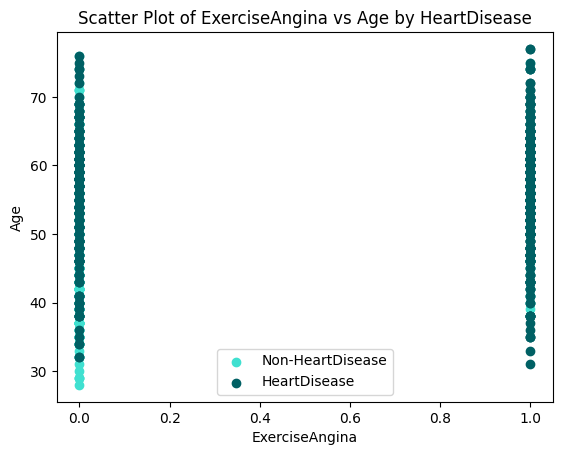

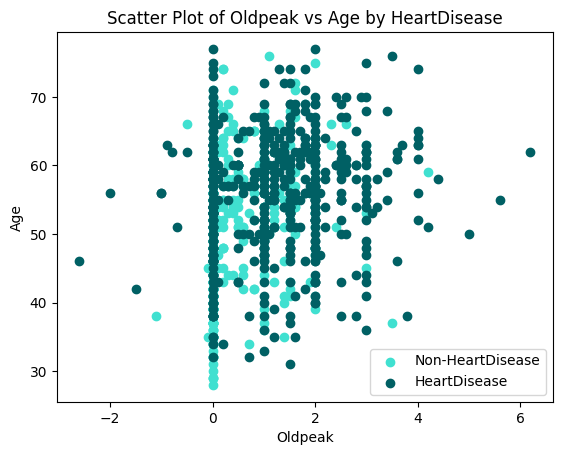

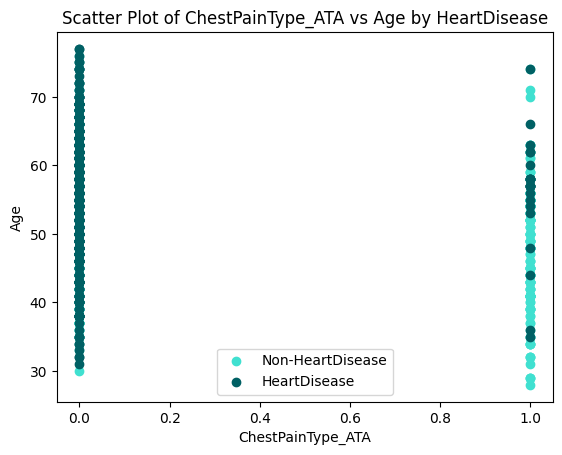

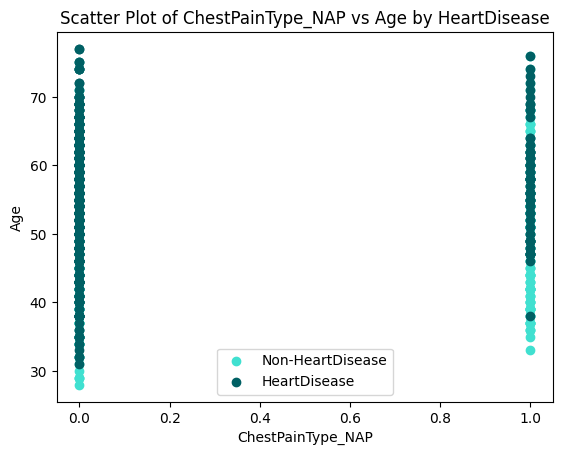

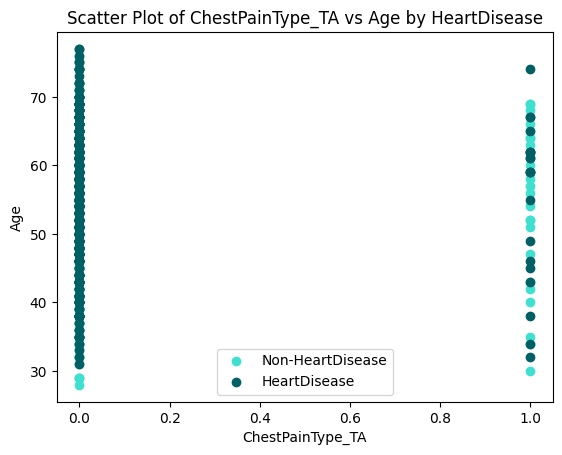

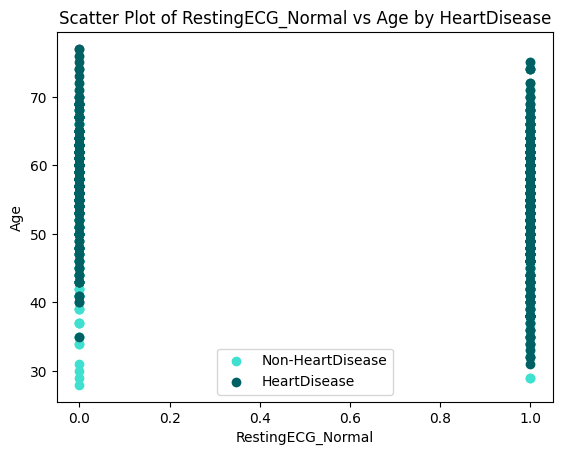

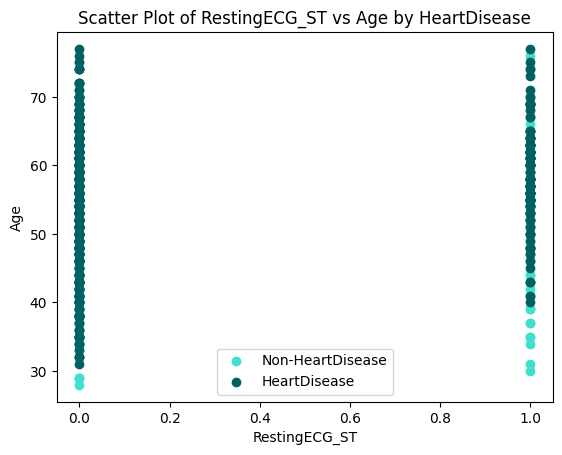

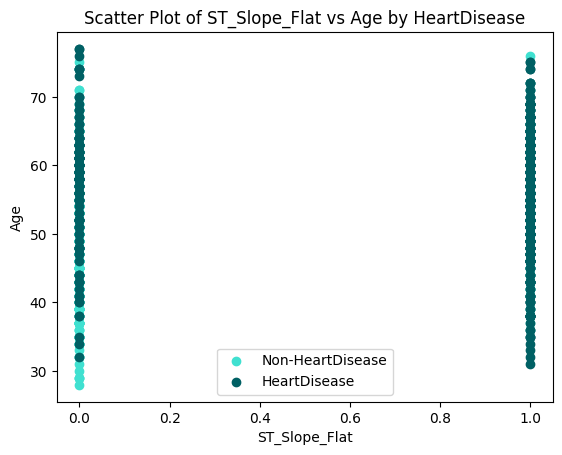

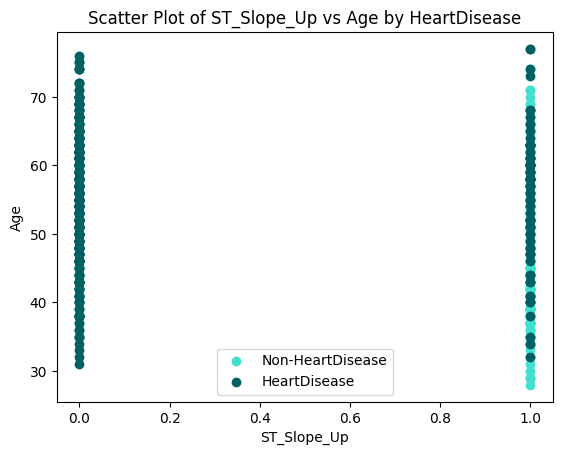

In [114]:
# Call the function to plot the scatter plots
labels = ['Non-HeartDisease', 'HeartDisease']
scatter_plots_by_feature_and_split(df_heart, ['Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
                                  'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
                                  'ST_Slope_Flat', 'ST_Slope_Up'], 'HeartDisease', 'Age', labels)

Con los resultados obtenidos, se muestra que las personas con enfermedades cardiovasculares tienden a estar dispersos entre todo el diagrama, esto puede indicar que la edad realmente no es un factor influyente para clasificar si una persona puede padecer o no de una enfermedad cardiovascular. En las columnas codificadas por el one-hot, es un poco más fácil de evidenciar que en su mayoría corresponden a persona que no padecen de estas enfermadades.

Con esto se concluye con el análisis del segundo dataset y con esto se puede proceder a la implementación de los modelos KNN, Regresión Lineal y Redes Neuronales para finalmente poder realizar las comparaciones solicitadas.